In [67]:
import os
import jsonlines
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [138]:
songs = []

for i in os.listdir(path='./artists'):
    with jsonlines.open('./artists/'+i,) as reader:
        for obj in reader:
            songs.append(obj)

In [157]:
songs[50]

{'song': 'Taylor-swift-enchanted-lyrics',
 'lyrics': '\n\n[Verse 1]\nThere I was again tonight\nForcing laughter, faking smiles\nSame old tired, lonely place\nWalls of insincerity, shifting eyes and vacancy\nVanished when I saw your face\nAll I can say is, it was enchanting to meet you\n\n[Verse 2]\nYour eyes whispered, "Have we met?"\nAcross the room your silhouette\nStarts to make its way to me\nThe playful conversation starts\nCounter all your quick remarks\nLike passing notes in secrecy\nAnd it was enchanting to meet you\nAll I can say is, I was enchanted to meet you\n\n[Chorus]\nThis night is sparkling\nDon\'t you let it go\nI\'m wonderstruck\nBlushing all the way home\nI\'ll spend forever\nWondering if you knew\nI was enchanted to meet you\n\n[Verse 3]\nThe lingering question kept me up\n2AM, who do you love?\nI wonder \'til I\'m wide awake\nAnd now I\'m pacing back and forth\nWishing you were at my door\nI\'d open up and you would say, "Hey"\nIt was enchanting to meet you\nAll I

In [139]:
lemzr = nltk.stem.WordNetLemmatizer()

songs_preprocessed = []

for i in songs:
    j = re.sub('\[.+?\]', '', i['lyrics'])
    j = nltk.wordpunct_tokenize(j)
    j = " ".join([lemzr.lemmatize(i).lower() for i in j])
    songs_preprocessed.append(j)

In [127]:
songs_preprocessed[0]

"when i find myself in time of trouble , mother mary come to me speaking word of wisdom , “ let it be ” and in my hour of darkness , she is standing right in front of me speaking word of wisdom , “ let it be ” let it be , let it be let it be , let it be whisper word of wisdom let it be and when the brokenhearted people living in the world agree there will be an answer , let it be for though they may be parted , there is still a chance that they will see there will be an answer , let it be let it be , let it be let it be , let it be yeah , there will be an answer let it be let it be , let it be let it be , let it be whisper word of wisdom let it be let it be , let it be let it be , yeah , let it be whisper word of wisdom let it be and when the night is cloudy , there is still a light that shine on me shine on ' til tomorrow , let it be i wake up to the sound of music , mother mary come to me speaking word of wisdom , let it be let it be , let it be let it be , yeah , let it be there wil

In [140]:
tfidf = TfidfVectorizer(analyzer="word", stop_words='english', min_df=3)

songs_tfidf = tfidf.fit_transform(songs_preprocessed)

In [141]:
songs_tfidf

<60x603 sparse matrix of type '<class 'numpy.float64'>'
	with 3948 stored elements in Compressed Sparse Row format>

In [142]:
svd = TruncatedSVD(n_components=2)

two_dim_vectors = svd.fit_transform(songs_tfidf)

In [143]:
two_dim_vectors[:5]

array([[ 0.18280622, -0.3310122 ],
       [ 0.1789588 ,  0.02077443],
       [ 0.19509573, -0.06392276],
       [ 0.32410169, -0.18546424],
       [ 0.10988623,  0.0138291 ]])

<Figure size 7200x7200 with 0 Axes>

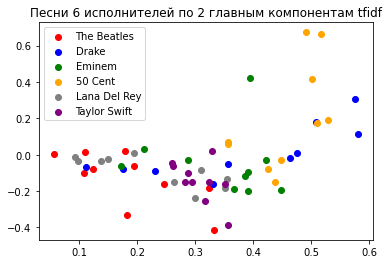

<Figure size 7200x7200 with 0 Axes>

In [165]:
plt.scatter(two_dim_vectors[:10, 0], two_dim_vectors[:10, 1], color='red', label='The Beatles')
plt.scatter(two_dim_vectors[10:20, 0], two_dim_vectors[10:20, 1], color='blue', label='Drake')
plt.scatter(two_dim_vectors[20:30, 0], two_dim_vectors[20:30, 1], color='green', label='Eminem')
plt.scatter(two_dim_vectors[30:40, 0], two_dim_vectors[30:40, 1], color='orange', label='50 Cent')
plt.scatter(two_dim_vectors[40:50, 0], two_dim_vectors[40:50, 1], color='grey', label='Lana Del Rey')
plt.scatter(two_dim_vectors[50:60, 0], two_dim_vectors[50:60, 1], color='purple', label='Taylor Swift')
plt.title('Песни 6 исполнителей по 2 главным компонентам tfidf')
plt.legend(loc='best')
plt.figure(figsize = (100, 100))

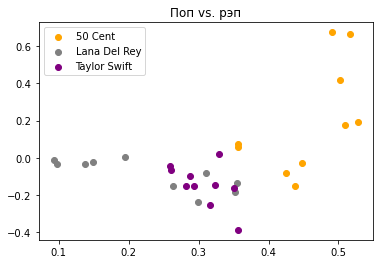

In [163]:
plt.scatter(two_dim_vectors[30:40, 0], two_dim_vectors[30:40, 1], color='orange', label='50 Cent')
plt.scatter(two_dim_vectors[40:50, 0], two_dim_vectors[40:50, 1], color='grey', label='Lana Del Rey')
plt.scatter(two_dim_vectors[50:60, 0], two_dim_vectors[50:60, 1], color='purple', label='Taylor Swift')
plt.title('Поп vs. рэп')
plt.legend(loc='best')

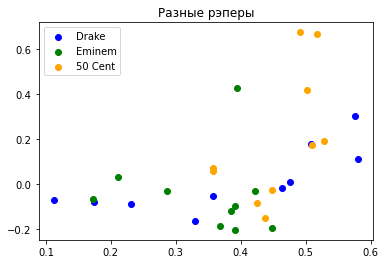

In [164]:
plt.scatter(two_dim_vectors[10:20, 0], two_dim_vectors[10:20, 1], color='blue', label='Drake')
plt.scatter(two_dim_vectors[20:30, 0], two_dim_vectors[20:30, 1], color='green', label='Eminem')
plt.scatter(two_dim_vectors[30:40, 0], two_dim_vectors[30:40, 1], color='orange', label='50 Cent')
plt.title('Разные рэперы')
plt.legend(loc='best')